In [226]:
# Import 패키지
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [227]:
covid = pd.read_csv('https://raw.githubusercontent.com/ammishra08/COVID-19/master/covid_19_datasets/covid_19_globaldata/covid_19_world.csv')
covid

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
116800,116801,09/23/2020,Zaporizhia Oblast,Ukraine,2020-09-24 04:23:38,3149.0,49.0,1158.0
116801,116802,09/23/2020,Zeeland,Netherlands,2020-09-24 04:23:38,1270.0,72.0,0.0
116802,116803,09/23/2020,Zhejiang,Mainland China,2020-09-24 04:23:38,1282.0,1.0,1272.0
116803,116804,09/23/2020,Zhytomyr Oblast,Ukraine,2020-09-24 04:23:38,5191.0,92.0,2853.0


In [228]:
# missing values 찾기
covid.isnull().sum()

SNo                    0
ObservationDate        0
Province/State     35353
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [229]:
# Datetime format
covid['ObservationDate'] = pd.to_datetime(covid['ObservationDate'])

In [230]:
covid

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
116800,116801,2020-09-23,Zaporizhia Oblast,Ukraine,2020-09-24 04:23:38,3149.0,49.0,1158.0
116801,116802,2020-09-23,Zeeland,Netherlands,2020-09-24 04:23:38,1270.0,72.0,0.0
116802,116803,2020-09-23,Zhejiang,Mainland China,2020-09-24 04:23:38,1282.0,1.0,1272.0
116803,116804,2020-09-23,Zhytomyr Oblast,Ukraine,2020-09-24 04:23:38,5191.0,92.0,2853.0


In [231]:
# observation date 그룹회 
covid_datewise = covid.groupby(['ObservationDate']).agg({'Confirmed':'sum', 'Deaths':'sum', 'Recovered':'sum'})
covid_datewise

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0
...,...,...,...
2020-09-19,30688150.0,955866.0,20922189.0
2020-09-20,30935011.0,959565.0,21159459.0
2020-09-21,31245797.0,963693.0,21394593.0


In [232]:
# 당일 확진자 
covid_datewise['Active'] = covid_datewise['Confirmed'] - covid_datewise['Recovered']

**Visualisation of Covid Cases** 

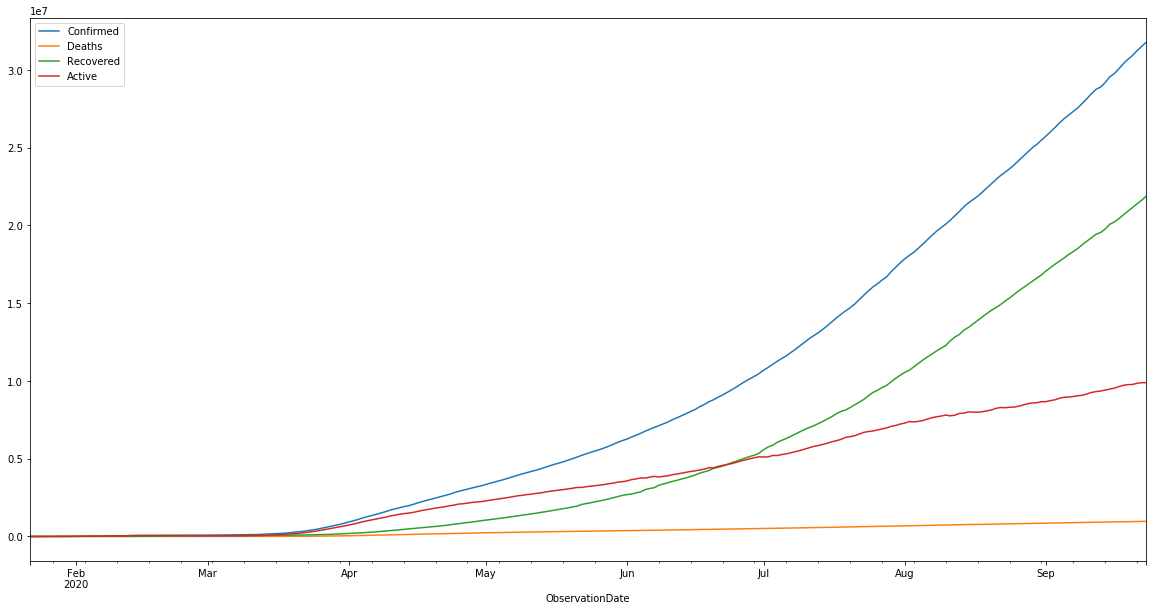

In [233]:
 covid_datewise.plot(figsize = (20,10))
plt.show()

In [234]:
# cufflinks 사용
from plotly.offline import iplot, init_notebook_mode 
import cufflinks  
cufflinks.go_offline(connected = True)

In [235]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

In [236]:
configure_plotly_browser_state()
init_notebook_mode(connected = True)
covid_datewise.iplot(title = 'Total number of cases of Covid19')

In [237]:
# 일일 확인된 자
covid_datewise['Daily Confirmed'] = covid_datewise['Confirmed'].diff()
covid_datewise

,Confirmed,Deaths,Recovered,Active,Daily Confirmed
ObservationDate,,,,,
2020-01-22,555.0,17.0,28.0,527.0,NaN
2020-01-23,653.0,18.0,30.0,623.0,98.0
2020-01-24,941.0,26.0,36.0,905.0,288.0
2020-01-25,1438.0,42.0,39.0,1399.0,497.0
2020-01-26,2118.0,56.0,52.0,2066.0,680.0
...,...,...,...,...,...
2020-09-19,30688150.0,955866.0,20922189.0,9765961.0,281953.0
2020-09-20,30935011.0,959565.0,21159459.0,9775552.0,246861.0
2020-09-21,31245797.0,963693.0,21394593.0,9851204.0,310786.0


In [238]:
configure_plotly_browser_state()
init_notebook_mode(connected = True)
covid_datewise['Daily Confirmed'].iplot(title = 'Daily confirmed cases of Covid19')

In [239]:
configure_plotly_browser_state()
init_notebook_mode(connected = True)
covid_datewise['Active'].iplot(title = 'active cases of Covid19')

**Covid19 - KoreaAnalysis**

In [240]:
#한국의 covid-19
covid_data = covid[covid['Country/Region'] == 'South Korea']
covid_data

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
37,38,2020-01-22,NaN,South Korea,1/22/2020 17:00,1.0,0.0,0.0
75,76,2020-01-23,NaN,South Korea,1/23/20 17:00,1.0,0.0,0.0
121,122,2020-01-24,NaN,South Korea,1/24/20 17:00,2.0,0.0,0.0
162,163,2020-01-25,NaN,South Korea,1/25/20 17:00,2.0,0.0,0.0
208,209,2020-01-26,NaN,South Korea,1/26/20 16:00,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...
113233,113234,2020-09-19,NaN,South Korea,2020-09-20 04:22:56,22975.0,383.0,20158.0
113975,113976,2020-09-20,NaN,South Korea,2020-09-21 04:23:18,23045.0,385.0,20248.0
114717,114718,2020-09-21,NaN,South Korea,2020-09-22 04:23:11,23106.0,388.0,20441.0
115460,115461,2020-09-22,NaN,South Korea,2020-09-23 04:23:40,23216.0,388.0,20650.0


In [241]:
covid_korea = covid_data.groupby(['ObservationDate']).agg({'Confirmed':'sum', 'Deaths':'sum', 'Recovered':'sum'})
covid_korea

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,1.0,0.0,0.0
2020-01-23,1.0,0.0,0.0
2020-01-24,2.0,0.0,0.0
2020-01-25,2.0,0.0,0.0
2020-01-26,3.0,0.0,0.0
...,...,...,...
2020-09-19,22975.0,383.0,20158.0
2020-09-20,23045.0,385.0,20248.0
2020-09-21,23106.0,388.0,20441.0


In [242]:
configure_plotly_browser_state()
init_notebook_mode(connected = True)
covid_korea.iplot(title = 'Total number of cases of Covid19 (South Korea)')

In [243]:
 configure_plotly_browser_state()
init_notebook_mode(connected = True)
covid_korea['Confirmed'].diff().iplot(title = 'Confirmed Cases of Covid19 in South Korea Daywise')

**LSTM Model**

In [244]:
import keras 
from keras.models import Sequential
from keras.layers import LSTM, Dense 
from keras.layers import Dropout 


from sklearn.preprocessing import MinMaxScaler 
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [245]:
covid_korea.reset_index(inplace = True)

In [246]:
# drop data
covid_data = covid_korea.drop(['ObservationDate','Deaths','Recovered'],axis = 1)
covid_data 

,Confirmed
0,1.0
1,1.0
2,2.0
3,2.0
4,3.0
...,...
241,22975.0
242,23045.0
243,23106.0
244,23216.0


**Train and Test**

In [247]:
train_data = covid_data[:-5]
test_data = covid_data[-5:]

**Data Preprocessing**

In [248]:
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(train_data)

MinMaxScaler(copy = True, feature_range = (0,1))

MinMaxScaler(copy=True, feature_range=(0, 1))

In [249]:
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

**LSTM Model**

In Time Series Forecasting
* Y = Confirmed cases
* X = Time Series Generator

In [250]:
n_inputs = 5

n_features = 1

generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length = n_inputs, batch_size = 5)

In [251]:
def build_model():
  lstm_model = Sequential() 

  # Layer 1
  lstm_model.add(LSTM(units = 64,
                      return_sequences = True,
                      input_shape = (n_inputs, n_features)))
  lstm_model.add(Dropout(0.2))  # to avoid over fitting 

  # Layer 2
  lstm_model.add(LSTM(units = 128,
                      return_sequences = True))
  lstm_model.add(Dropout(0.2))  # to avoid over fitting 

  # Layer 3
  lstm_model.add(LSTM(units = 128,
                      return_sequences = True))
  lstm_model.add(Dropout(0.2))  # to avoid over fitting 

  # Layer 3
  lstm_model.add(LSTM(units = 128,
                      return_sequences = True))
  lstm_model.add(Dropout(0.5))  # to avoid over fitting

  # output layer
  lstm_model.add(LSTM(units = 1))

  # compile
  lstm_model.compile(optimizer = 'Adam',
                     loss = 'mean_squared_error',
                     metrics = ['mean_squared_error','mean_absolute_error'])
  
  return lstm_model

In [252]:
lstm_model = build_model()
lstm_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (None, 5, 64)             16896     
_________________________________________________________________
dropout_16 (Dropout)         (None, 5, 64)             0         
_________________________________________________________________
lstm_21 (LSTM)               (None, 5, 128)            98816     
_________________________________________________________________
dropout_17 (Dropout)         (None, 5, 128)            0         
_________________________________________________________________
lstm_22 (LSTM)               (None, 5, 128)            131584    
_________________________________________________________________
dropout_18 (Dropout)         (None, 5, 128)            0         
_________________________________________________________________
lstm_23 (LSTM)               (None, 5, 128)           

In [253]:
results = lstm_model.fit(generator,epochs = 100)

Epoch 1/100
48/48 [==============================] - 1s 24ms/step - loss: 0.0926 - mean_squared_error: 0.0926 - mean_absolute_error: 0.2255 0s - loss: 0.0983 - mean_squared_error: 0.0983 - mean_absolute_error: 0.
Epoch 2/100
48/48 [==============================] - 1s 22ms/step - loss: 0.0160 - mean_squared_error: 0.0160 - mean_absolute_error: 0.0933
Epoch 3/100
48/48 [==============================] - 1s 23ms/step - loss: 0.0042 - mean_squared_error: 0.0042 - mean_absolute_error: 0.0512
Epoch 4/100
48/48 [==============================] - 1s 27ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - mean_absolute_error: 0.0451
Epoch 5/100
48/48 [==============================] - 1s 23ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - mean_absolute_error: 0.0434
Epoch 6/100
48/48 [==============================] - 1s 21ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - mean_absolute_error: 0.0420
Epoch 7/100
48/48 [==============================] - 1s 23ms/step - loss: 0.0029 - mean

48/48 [==============================] - 1s 20ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - mean_absolute_error: 0.0291
Epoch 57/100
48/48 [==============================] - 1s 21ms/step - loss: 0.0036 - mean_squared_error: 0.0036 - mean_absolute_error: 0.0424
Epoch 58/100
48/48 [==============================] - 1s 22ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - mean_absolute_error: 0.0304
Epoch 59/100
48/48 [==============================] - 1s 21ms/step - loss: 9.8348e-04 - mean_squared_error: 9.8348e-04 - mean_absolute_error: 0.0238
Epoch 60/100
48/48 [==============================] - 1s 21ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - mean_absolute_error: 0.0311
Epoch 61/100
48/48 [==============================] - 1s 22ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - mean_absolute_error: 0.0323
Epoch 62/100
48/48 [==============================] - 1s 22ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - mean_absolute_error: 0.0306
Epoch 63/100
48/48

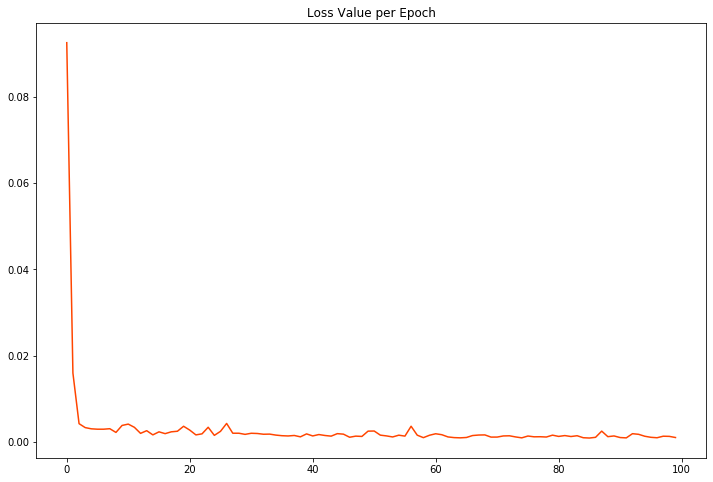

In [254]:
pd.DataFrame(results.history)['loss'].plot(title = 'Loss Value per Epoch', 
                                           color = 'orangered', 
                                           figsize = (12,8))

In [255]:
# 데이터 예측
lstm_predictions_scaled = []
batch = scaled_test_data
current_batch = batch.reshape((1,n_inputs,n_features))
for i in range(len(test_data)):
  lstm_pred = lstm_model.predict(current_batch)[0]
  lstm_predictions_scaled.append(lstm_pred)
  current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]], axis = 1)

prediction = pd.DataFrame(scaler.inverse_transform(lstm_predictions_scaled))

In [256]:
pd.concat([np.round(prediction), test_data.reset_index().drop(['index'],axis = 1)],axis = 1)

,0,Confirmed
0,22311.0,22975.0
1,22317.0,23045.0
2,22308.0,23106.0
3,22282.0,23216.0
4,22234.0,23341.0


**FBProphet Model**

This is an open source API for time series forecasting

In [257]:
from fbprophet import Prophet

In [258]:
prophet_model = Prophet(interval_width = 0.98,
                        daily_seasonality = True,
                        weekly_seasonality = True,
                        )

In [259]:
# FBProphet 사용
prophet_df = pd.DataFrame(zip(list(covid_korea.ObservationDate),
                              list(covid_korea.Confirmed)),
                          columns = ['ds','y'])   
prophet_df

,ds,y
0,2020-01-22,1.0
1,2020-01-23,1.0
2,2020-01-24,2.0
3,2020-01-25,2.0
4,2020-01-26,3.0
...,...,...
241,2020-09-19,22975.0
242,2020-09-20,23045.0
243,2020-09-21,23106.0
244,2020-09-22,23216.0


In [260]:
# Training model 
prophet_model.fit(prophet_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
C:\Users\USER\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [261]:
# Forecasting for next 77 days
forecast_c = prophet_model.make_future_dataframe(periods = 77)
forecast_c

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
318,2020-12-05
319,2020-12-06
320,2020-12-07
321,2020-12-08


In [262]:
confirmed_forecast = prophet_model.predict(forecast_c)
confirmed_forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-22,-128.925361,-1066.121792,868.787828
1,2020-01-23,-103.633978,-990.396314,887.684299
2,2020-01-24,-95.820209,-1001.434977,790.842879
3,2020-01-25,-78.686423,-1010.909697,873.764558
4,2020-01-26,-97.223747,-1054.278592,851.941289
...,...,...,...,...
318,2020-12-05,38390.149815,25619.022706,53328.288420
319,2020-12-06,38566.713754,25385.150876,53354.915277
320,2020-12-07,38741.878804,25489.629447,53808.477786
321,2020-12-08,38932.747028,25538.232582,54540.044191


Figure(720x432)


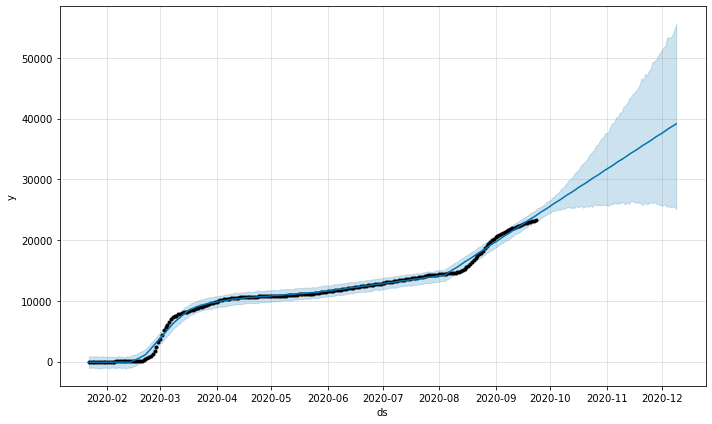

In [263]:
print(prophet_model.plot(confirmed_forecast))